# Tugas Computer Vision - Pengantar Citra 2D



### NAMA: Ahmed Fisqiya Pinaldin
### NIM: A710190120

In [1]:
from time import ctime
from os import getcwd
import sys
nama = "Ahmed Fisqiya Pinaldin"     ## Ganti dengan namamu
NIM = "A710190120"     ## Ganti dengan NIM-mu
kota = "Surakarta"     ## Ganti dengan kotamu
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)


NAMA: Ahmed Fisqiya Pinaldin
NIM : A710190120
Kota: Surakarta
Sat Mar 19 14:18:55 2022

D:\Comvis
c:\users\hp\appdata\local\programs\python\python39\python.exe
3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]


##  Import the libraries


In [2]:
## Silakan import semua library yang diperlukan di cell ini
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Acquire your image

### Ambil sebuah foto icon atau tempat wisata di kotamu (misal kalau dari Jogja ambil foto tugu jogja)
#### Spesifikasi foto:
* Foto berwarna
* Foto icon atau tempat wisata di kotamu
* Foto boleh diambil sendiri atau diambil dari internet
* Diambil pada siang hari
* Memperlihatkan langit 

Lalu tampilkan di sini:

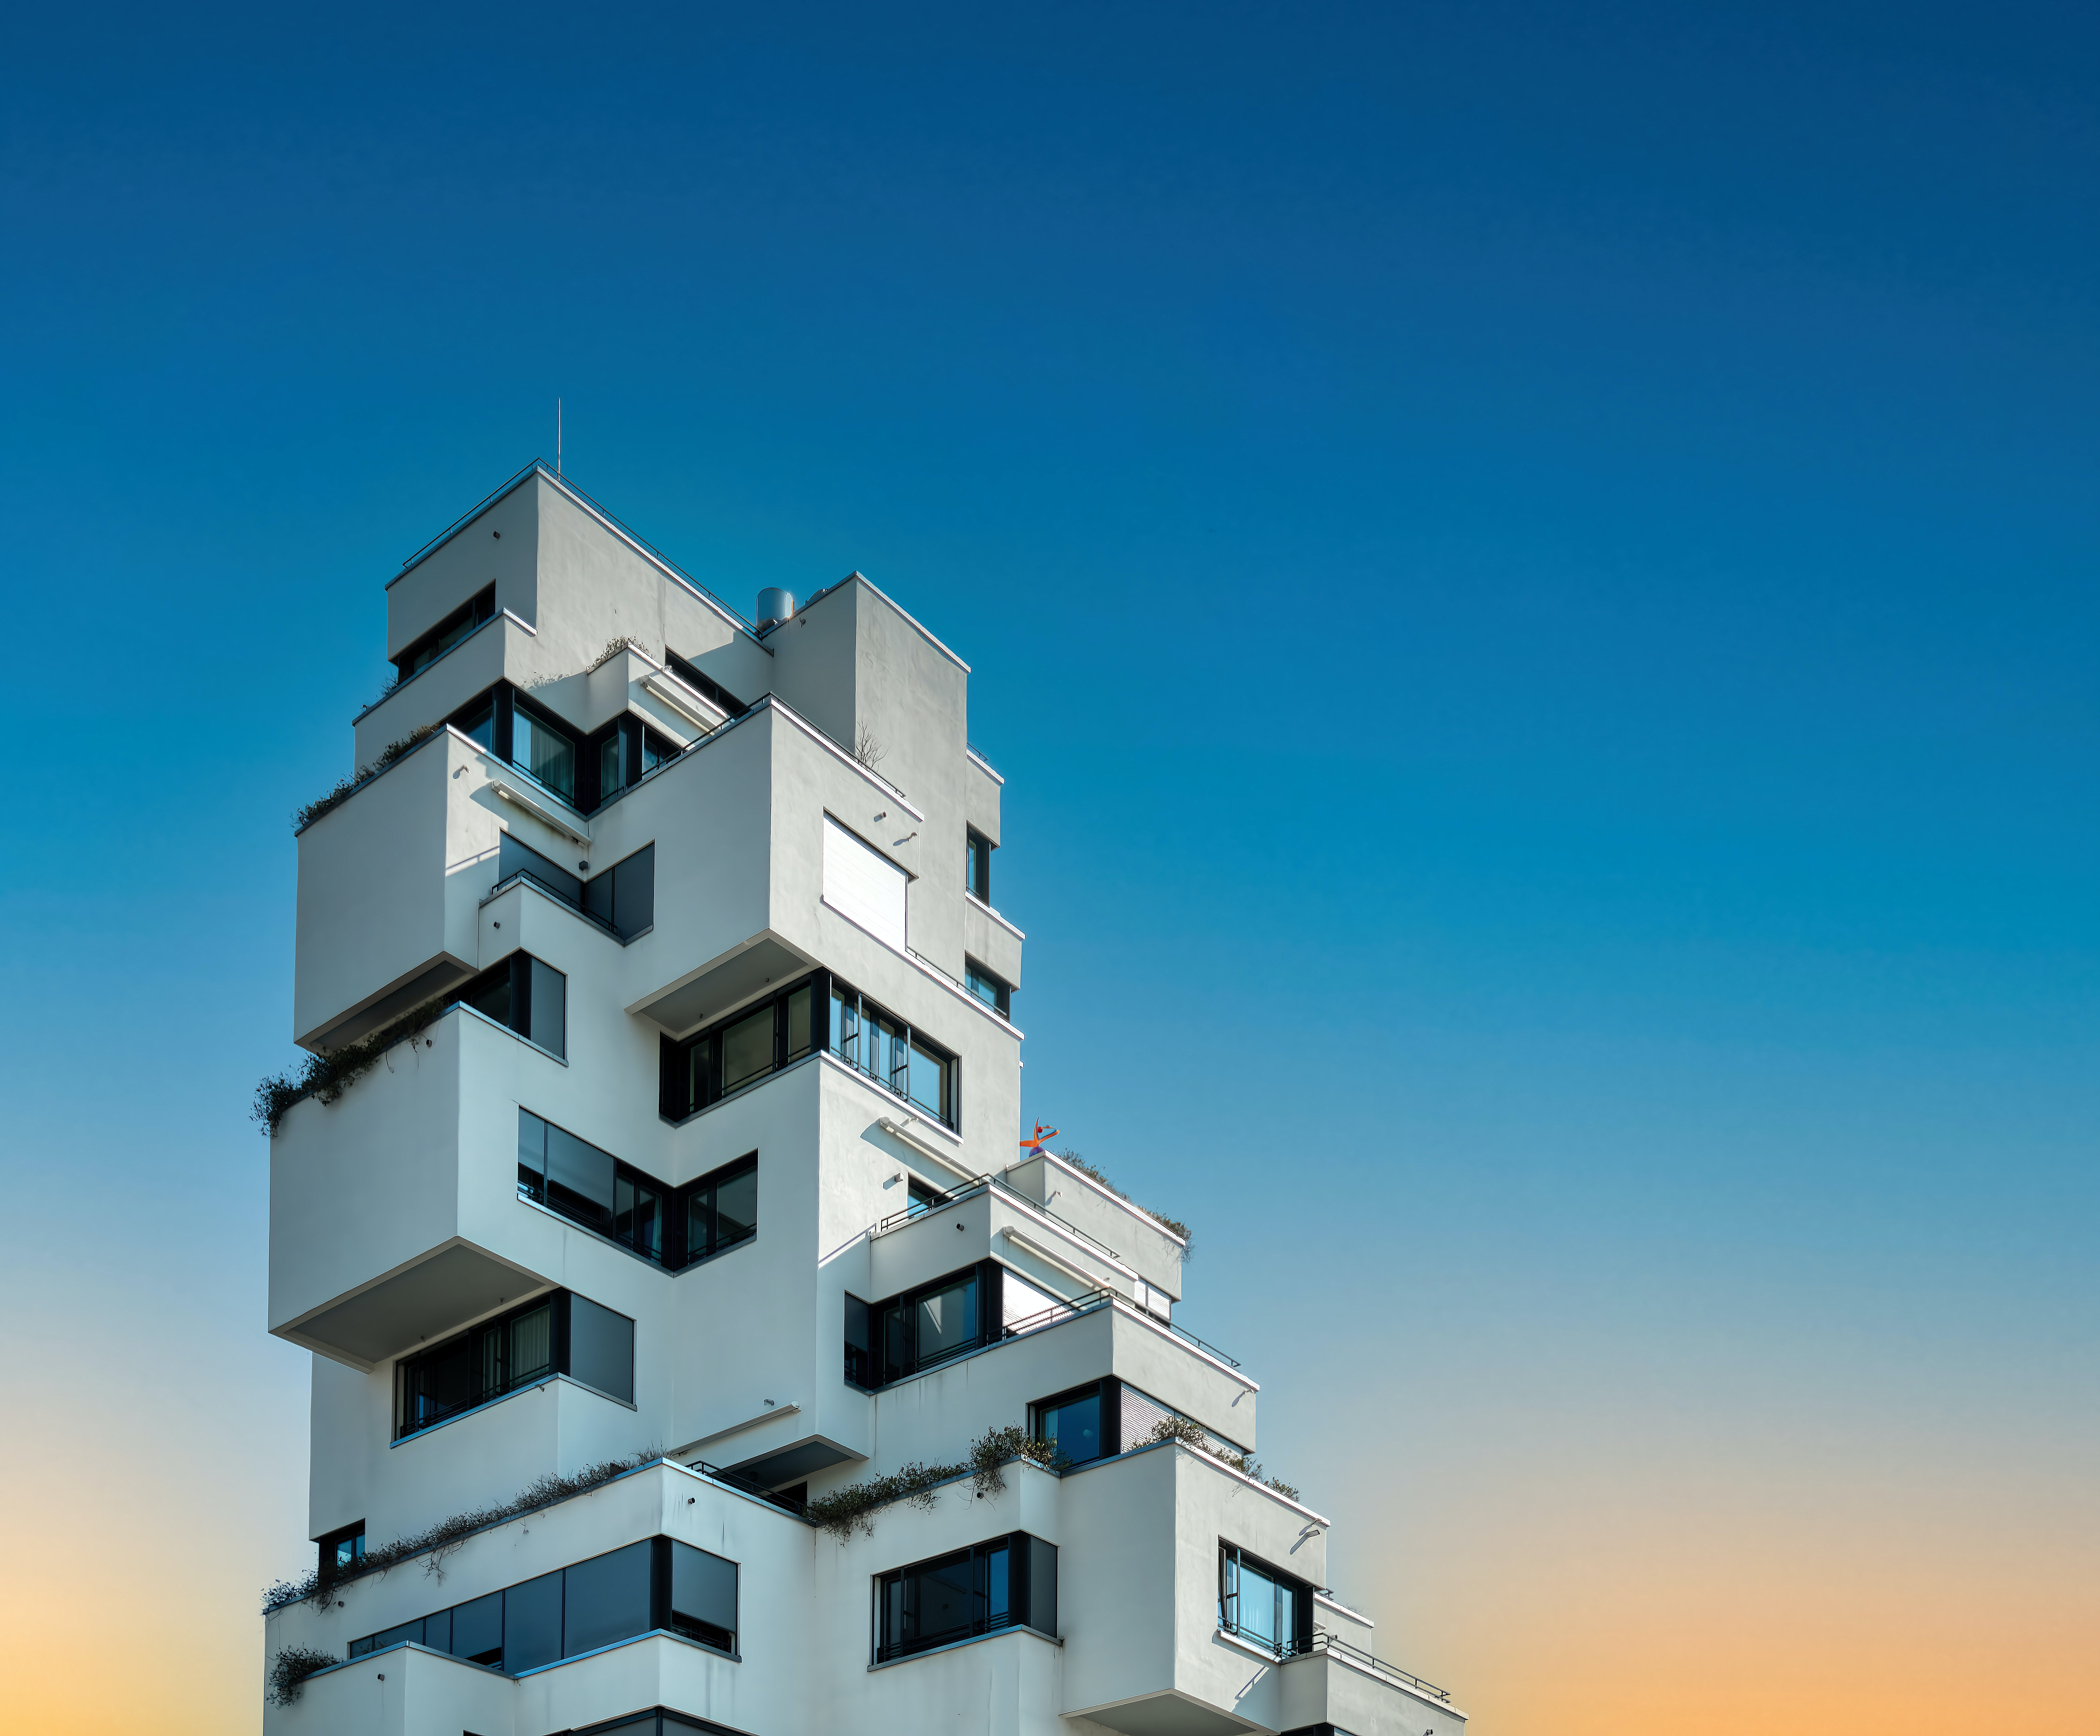

In [3]:
## Perintah untuk menampilkan gambar
Image(filename="space.jpg")

### Memakai OpenCV, ketik perintah untuk memuat gambar dan mengetahui ukuran gambar

In [9]:
## Memuat gambar:
x = cv2.imread("space.jpg", 1)
## Mengetahui ukuran gambar
print("Image size is ", x.shape)

Image size is  (5095, 6162, 3)


#### Lebar dan tingginya berapa? Apa makna angka 3 di situ?
Jawaban:
<br>Tinggi = 5095
<br>Lebar = 6162
<br>angka 3 merupakan jumlah banyaknya chanel pada gambar di atas

<hr>

### Menampilkan gambar memakai OpenCV.


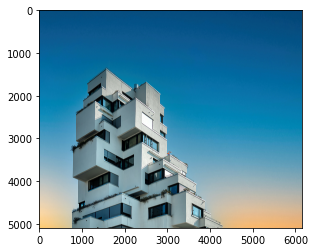

In [32]:
# Ambil file gambar memakai option cv2.IMREAD_COLOR
# Jika perlu, perlu dibalik antara RGB dan BGR. 
x = cv2.imread("space.jpg", cv2.IMREAD_COLOR)
# Kode untuk menampilkan gambar melalui OpenCV.
x_factor = x[:, :, ::-1]
plt.imshow(x_factor)

### Splitting and Merging Color Channels
 Masih menggunakan foto ikon kotamu, pisahkan channel B, G, R dan tampilkan masing-masing channel. Lalu tampilkan hasil merge-nya.

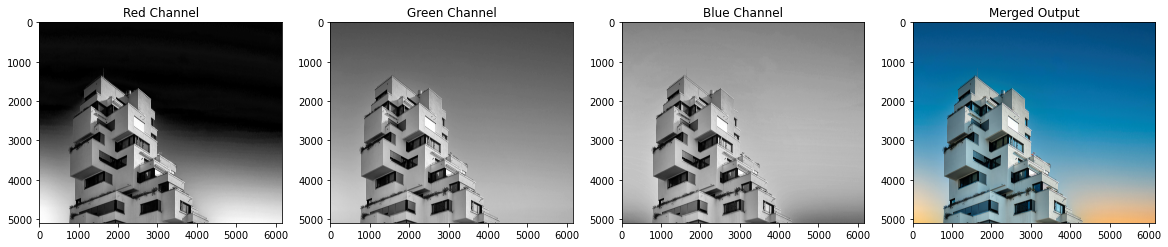

In [11]:
## Pisahkan citra-nya ke komponen-komponen B,G,R -nya
img_space_bgr = cv2.imread("space.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img_space_bgr)
# Tunjukkan tiap-tiap channel dan hasil merge-nya, seperti di file latihan
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

imgMerged = cv2.merge((b,g,r))

plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

##### Mengubah nilai di channel tertentu

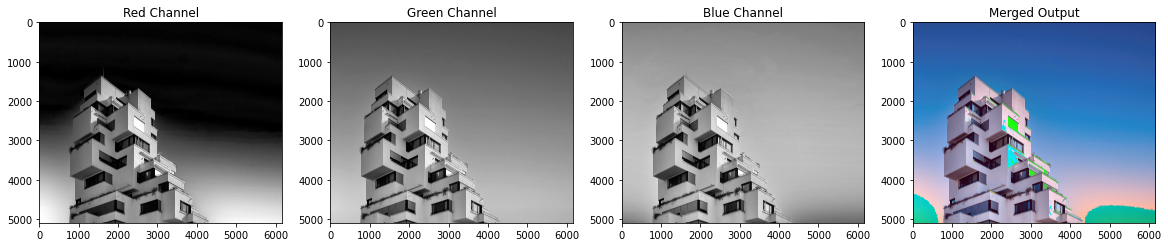

In [14]:
# Tambahkan 5 (atau lebih besar) pada channel biru (atau channel lainnya), 
# lalu tampilkan hasilnya. Silakan mengubah nilai di beberapa channel.
plusb = b+20
plusr = r+35
b,g,r = cv2.split(img_space_bgr)
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");
imgMerged = cv2.merge((plusb,g,plusr))
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

### Changing from BGR to RGB

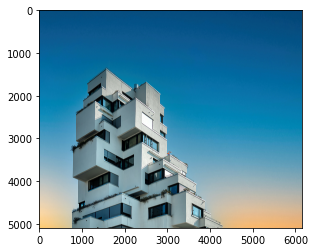

In [15]:
# OpenCV stores color channels in a different order than most other applications (BGR vs RGB).
# Ambil file image sebagai RGB dengan option cv2.COLOR_BGR2RGB
# Lalu tampilkan memakai plt.imshow
img_space_rgb = cv2.cvtColor(img_space_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_space_rgb)

### Changing to HSV color space

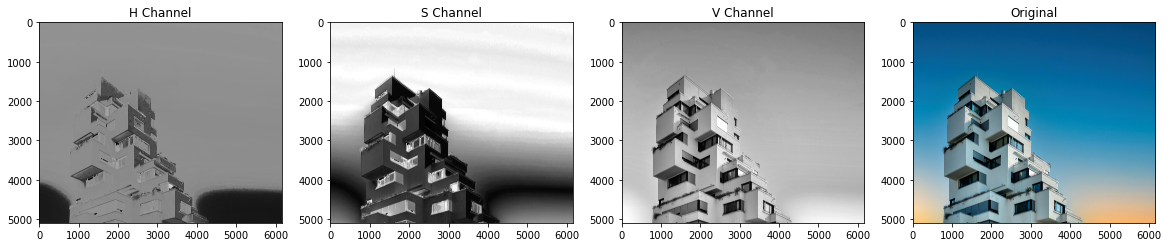

In [16]:
# Ambil file gambar memakai option  cv2.COLOR_BGR2HSV
# Lalu pisahkan ke channel H, S, V
img_hsv = cv2.cvtColor(img_space_bgr, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)

# Tunjukkan tiap-tiap channel dan hasil merge-nya, seperti di file latihan
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_space_rgb);plt.title("Original");

##### Mengubah nilai di channel H

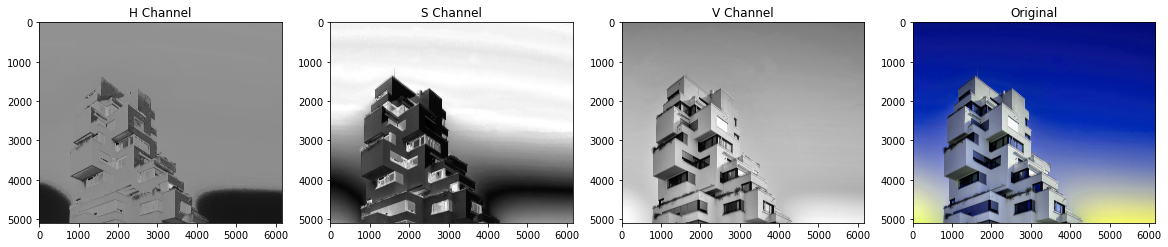

In [19]:
# Tambahkan 5 (atau lebih besar) pada channel H 
# lalu tampilkan hasilnya.
h_alo = h+15
img_space_merged = cv2.merge((h_alo,s,v))
img_space_rgb = cv2.cvtColor(img_space_merged, cv2.COLOR_HSV2RGB)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_space_rgb);plt.title("Original");

### Memodifikasi Gambar
Menggunakan OpenCV, buatlah sebuah kotak berwarna kuning pada gambarmu, bertempat di bagian langit di fotomu.
Kamu diharuskan memisah gambarmua ke channel B,G,R dulu, lalu tentukan lokasi dan besar kotakmu. Masing-masing kotak di tiga channel itu diberi angka yang nanti pada akhirnya membentuk warna kuning.

Lalu ketiga channel itu di-merge.

Untuk membuat kotak di dalam gambar, lihat video kuliah.

Contoh jadi:

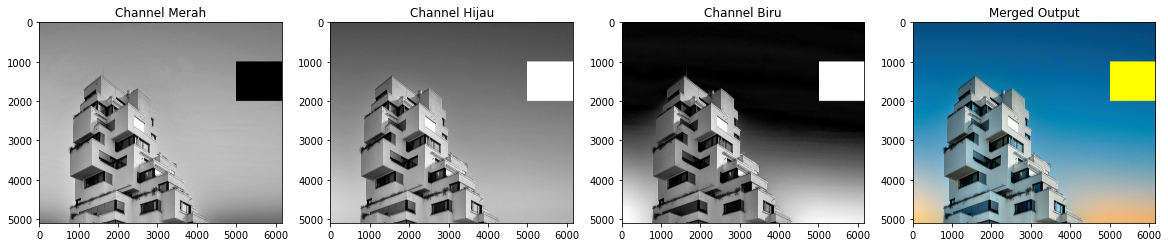

In [29]:
# Kode untuk membuat kotak kuning:
shape = plt.imread(r'space.jpg')
shape[1000:2000,5000:7000] = 255,255,0
b, g, r = cv2.split(shape)
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Channel Merah");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Channel Hijau");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Channel Biru");
imgMerged = cv2.merge((b, g, r))
plt.subplot(144);plt.imshow(imgMerged);plt.title("Merged Output");

## Akhir Tugas